In [2]:
words = []
import csv
with open('arabic_names.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        words.append(row[0].strip())
del words[0]

In [3]:
len(words)

1405

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

10

In [5]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        biagram = (ch1, ch2)
        b[biagram] = b.get(biagram, 0) + 1


In [6]:
sorted(b.items(), key= lambda kv: -kv[1])

[(('ة', '<E>'), 265),
 (('<s>', 'م'), 188),
 (('<s>', 'ع'), 151),
 (('ر', '<E>'), 149),
 (('د', '<E>'), 126),
 (('<s>', 'ر'), 126),
 (('م', '<E>'), 123),
 (('ن', '<E>'), 123),
 (('ا', 'ل'), 106),
 (('<s>', 'ن'), 99),
 (('<s>', 'أ'), 95),
 (('ا', 'ن'), 94),
 (('ي', '<E>'), 86),
 (('<s>', 'س'), 86),
 (('ل', '<E>'), 77),
 (('ا', 'ر'), 69),
 (('د', 'ا'), 69),
 (('ر', 'ا'), 69),
 (('ر', 'ي'), 66),
 (('ب', '<E>'), 66),
 (('<s>', 'ف'), 64),
 (('ا', 'م'), 63),
 (('ع', 'ب'), 63),
 (('<s>', 'ب'), 59),
 (('ي', 'م'), 58),
 (('ب', 'د'), 57),
 (('ن', 'ا'), 56),
 (('ا', 'د'), 50),
 (('م', 'ي'), 50),
 (('ي', 'ا'), 49),
 (('ف', '<E>'), 48),
 (('م', 'ا'), 47),
 (('ي', 'ن'), 46),
 (('د', 'ي'), 46),
 (('<s>', 'ش'), 46),
 (('ي', 'د'), 45),
 (('<s>', 'ح'), 45),
 (('ا', 'ء'), 44),
 (('ب', 'ا'), 43),
 (('ح', '<E>'), 42),
 (('ء', '<E>'), 42),
 (('ا', '<E>'), 41),
 (('س', 'ا'), 40),
 (('ه', 'ا'), 39),
 (('ل', 'ي'), 39),
 (('<s>', 'ج'), 39),
 (('ا', 'ب'), 37),
 (('ي', 'ر'), 37),
 (('ى', '<E>'), 37),
 (('ي', 'ة')

In [7]:
import torch

In [8]:
N = torch.zeros((38, 38), dtype=torch.int32)

In [9]:
chars = sorted(list(set(''.join(words))))

# maping strings to integers
stoi = {s:i+1 for i,s in enumerate(chars)}

# adding special characters
stoi['.'] = 0

# maping integers to string
itos = {i: s for s, i in stoi.items()}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

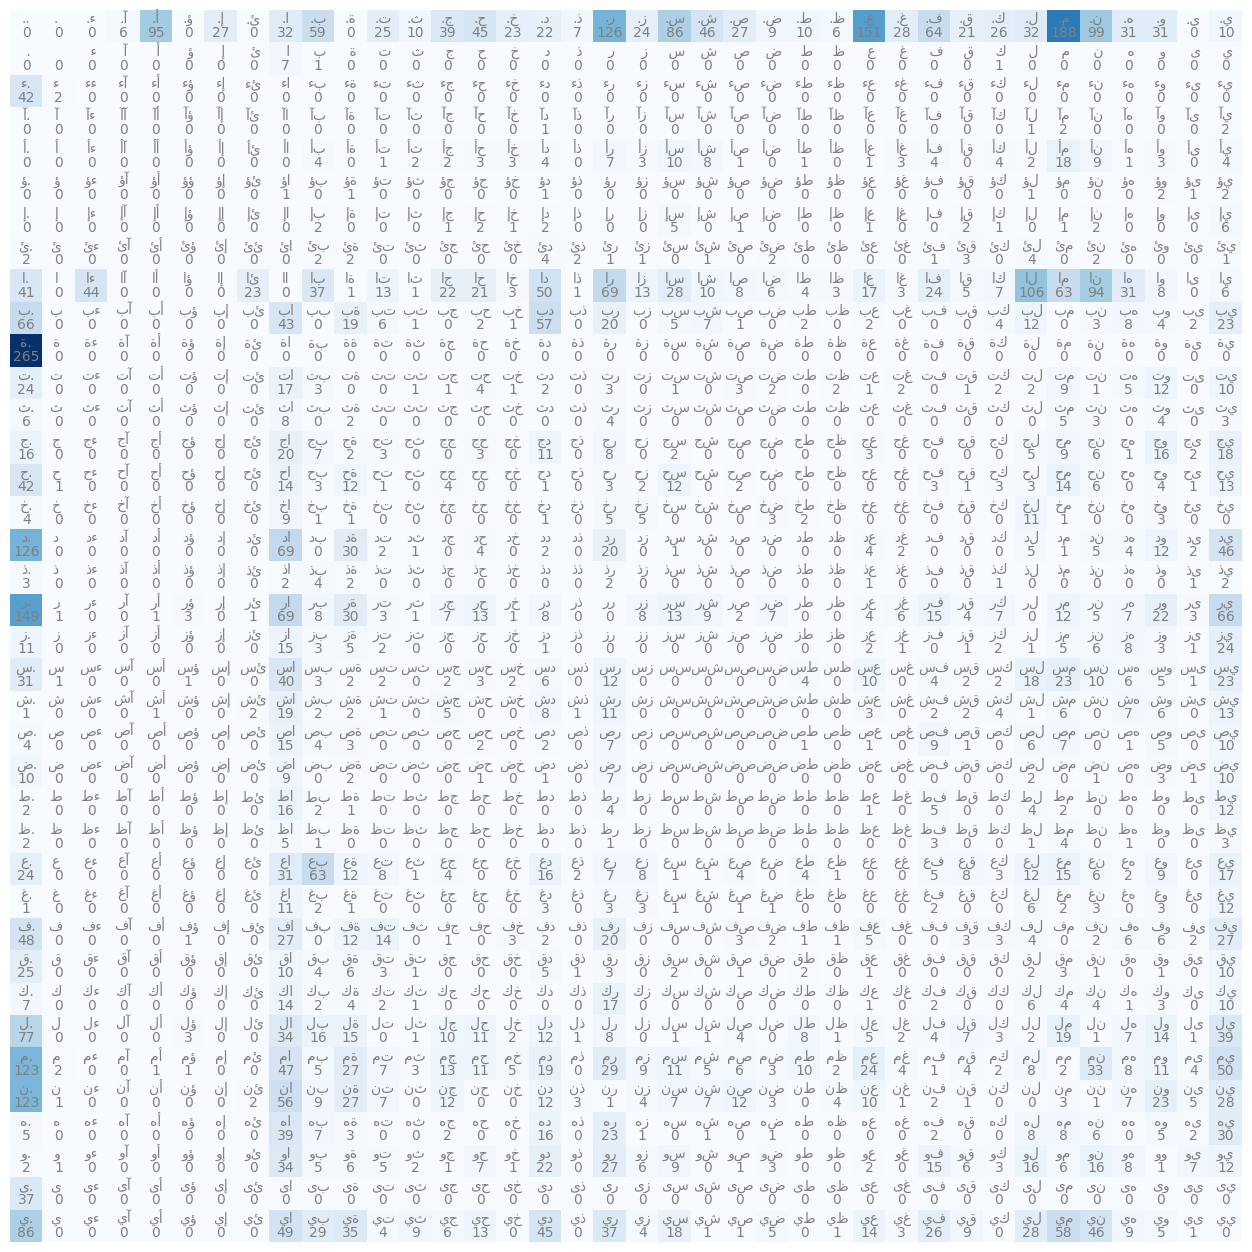

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(38):
    for j in range(38):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off');

In [12]:
N[0]

tensor([  0,   0,   0,   6,  95,   0,  27,   0,  32,  59,   0,  25,  10,  39,
         45,  23,  22,   7, 126,  24,  86,  46,  27,   9,  10,   6, 151,  28,
         64,  21,  26,  32, 188,  99,  31,  31,   0,  10], dtype=torch.int32)

In [13]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0043, 0.0676, 0.0000, 0.0192, 0.0000, 0.0228,
        0.0420, 0.0000, 0.0178, 0.0071, 0.0278, 0.0320, 0.0164, 0.0157, 0.0050,
        0.0897, 0.0171, 0.0612, 0.0327, 0.0192, 0.0064, 0.0071, 0.0043, 0.1075,
        0.0199, 0.0456, 0.0149, 0.0185, 0.0228, 0.1338, 0.0705, 0.0221, 0.0221,
        0.0000, 0.0071])

In [14]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[0]


'.'

In [15]:
# prepare the probability in an array ready instead of calculate it inside the 
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [16]:
P[0].sum()

tensor(1.)

In [17]:
import torch.nn.functional as F

In [27]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

total_words = 0
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'number of examples = {num}')
print(f"the examples are {xs}")

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((38, 38), generator=g, requires_grad=True)

number of examples = 7646
the examples are tensor([ 0,  8,  9,  ..., 29, 35,  9])
and the total words are 7646


In [32]:
(W**2).mean()

4.169792175292969


In [ ]:
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=38).float()
    logits = xenc @ W
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backword pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

4.169792175292969
3.8030285835266113
3.5700557231903076
3.406010389328003
3.283822774887085
3.192992925643921
3.1240322589874268
3.0693821907043457
3.024494171142578
2.9869015216827393
2.955054521560669
2.9277992248535156
2.9042341709136963
2.8836615085601807
2.8655450344085693
2.8494691848754883
2.8351058959960938
2.8221898078918457
2.8105058670043945
2.7998766899108887
2.790158271789551
2.7812294960021973
2.7729904651641846
2.765359401702881
2.7582662105560303
2.7516531944274902
2.7454710006713867
2.7396767139434814
2.7342350482940674
2.729112386703491
2.72428297996521
2.7197210788726807
2.715404748916626
2.711315393447876
2.7074344158172607
2.703747034072876
2.7002384662628174
2.6968953609466553
2.6937062740325928
2.6906611919403076
2.6877503395080566
2.684964895248413
2.6822969913482666
2.679739236831665
2.6772851943969727
2.67492938041687
2.67266583442688
2.6704890727996826
2.668395519256592
2.666379928588867
2.6644389629364014
2.6625688076019287
2.6607656478881836
2.6590261459350

In [31]:
xenc = F.one_hot(xs, num_classes=38).float()
len(xenc[:, 0])

7646

In [ ]:
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=38).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))



راواعفا.
عباسبتوفق.
تار.
عغام.
ب.
